In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,81349.0,-1.691838,0.587681,1.084080,0.623262,0.308714,-0.715355,-0.281859,0.560378,-0.818816,...,-0.213735,-0.821446,-0.440117,-0.021770,-0.021786,0.283635,0.176712,-0.167812,2.99,0
1,53018.0,1.082178,-0.144398,0.800534,1.370035,-0.363806,0.792706,-0.502635,0.355730,0.677723,...,-0.053305,0.151551,-0.127627,-0.280057,0.614613,-0.255175,0.065279,0.010025,16.84,0
2,155646.0,1.974999,-0.588383,-1.731126,-0.682392,1.820559,3.777453,-1.106128,1.028121,1.121127,...,-0.183396,-0.488085,0.413784,0.657125,-0.389861,-0.601233,0.054934,-0.037570,4.99,0
3,142139.0,1.923554,0.620949,-0.895021,3.505835,0.740060,0.208149,0.184462,-0.001163,-1.425444,...,0.275248,0.746080,0.092254,0.755247,0.116043,0.076489,-0.053163,-0.055275,0.00,0
4,85457.0,-3.279920,2.018402,-0.990921,-0.059243,-0.644268,1.787100,-1.125419,2.526816,-0.661421,...,0.070074,0.076658,0.053485,-1.728395,-0.053550,0.395310,-0.399545,-0.259312,65.74,0


In [3]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


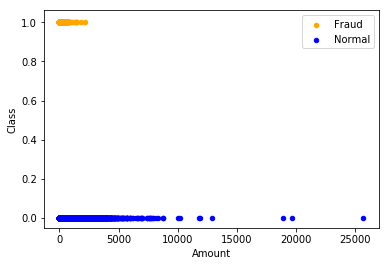

In [4]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

This feature looks important based on their distribution with respect to class.  
We will now zoom in onto the fraud data to see the ranges of amount just for fun.

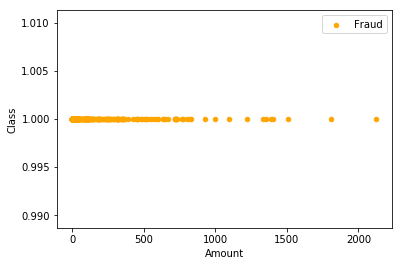

In [5]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

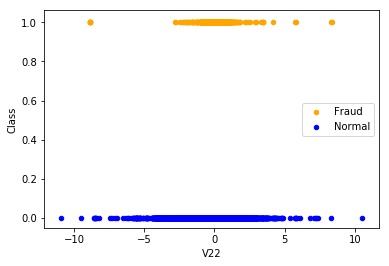

In [6]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

This feature may not be very important because of the similar distribution.

# Logistic Regression (vanilla)

In [7]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [8]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=500)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 187 0.001875946751201308
Number of frauds on y_train: 305 0.001647544348652795


In [9]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.998956692716


In [10]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

Confusion matrix:
Predicted      0    1  __all__
Actual                        
0          99469   27    99496
1             77  110      187
__all__    99546  137    99683


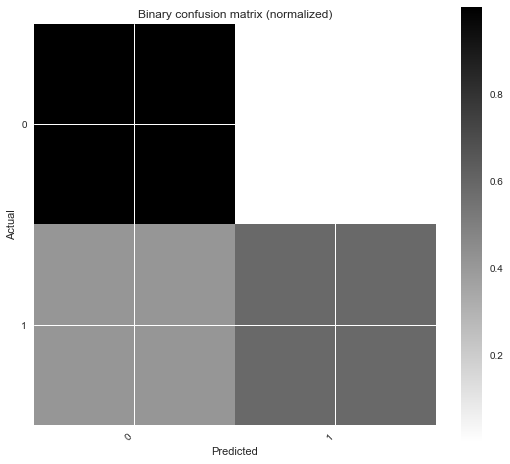

population: 99683
P: 187
N: 99496
PositiveTest: 137
NegativeTest: 99546
TP: 110
TN: 99469
FP: 27
FN: 77
TPR: 0.588235294118
TNR: 0.999728632307
PPV: 0.802919708029
NPV: 0.999226488257
FPR: 0.000271367693174
FDR: 0.197080291971
FNR: 0.411764705882
ACC: 0.998956692716
F1_score: 0.679012345679
MCC: 0.686755434733
informedness: 0.587963926424
markedness: 0.802146196286
prevalence: 0.0018759467512
LRP: 2167.66884532
LRN: 0.411876475851
DOR: 5262.91005291
FOR: 0.000773511743315


In [11]:
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

# Logistic Regression with SMOTE over-sampling and scaling

In [12]:
import pandas_ml as pdml
df2 = pdml.ModelFrame(X, target=y)
sampler = df2.imbalance.over_sampling.SMOTE()
sampled = df2.fit_sample(sampler)
print("Size of dataset after over sampling:", len(sampled))

Size of dataset after over sampling: 568630


In [13]:
sampled

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,81349.000000,-1.691838,0.587681,1.084080,0.623262,0.308714,-0.715355,-0.281859,0.560378,...,0.082173,-0.213735,-0.821446,-0.440117,-0.021770,-0.021786,0.283635,0.176712,-0.167812,2.990000
1,0,53018.000000,1.082178,-0.144398,0.800534,1.370035,-0.363806,0.792706,-0.502635,0.355730,...,-0.179501,-0.053305,0.151551,-0.127627,-0.280057,0.614613,-0.255175,0.065279,0.010025,16.840000
2,0,155646.000000,1.974999,-0.588383,-1.731126,-0.682392,1.820559,3.777453,-1.106128,1.028121,...,-0.152369,-0.183396,-0.488085,0.413784,0.657125,-0.389861,-0.601233,0.054934,-0.037570,4.990000
3,0,142139.000000,1.923554,0.620949,-0.895021,3.505835,0.740060,0.208149,0.184462,-0.001163,...,-0.251962,0.275248,0.746080,0.092254,0.755247,0.116043,0.076489,-0.053163,-0.055275,0.000000
4,0,85457.000000,-3.279920,2.018402,-0.990921,-0.059243,-0.644268,1.787100,-1.125419,2.526816,...,-0.528622,0.070074,0.076658,0.053485,-1.728395,-0.053550,0.395310,-0.399545,-0.259312,65.740000
5,0,126370.000000,-0.848097,0.778988,0.965226,-0.487616,-0.411856,0.224920,0.022224,0.675187,...,0.065874,0.400771,1.198133,-0.223904,-0.441751,0.041747,-0.041505,0.277055,0.143130,56.160000
6,0,48279.000000,-0.152630,0.781415,0.443797,0.663633,0.878934,-0.064406,0.708189,-0.069442,...,0.370472,-0.126460,-0.285785,0.041307,-1.016661,-0.328685,-0.500945,0.371514,0.167216,46.980000
7,0,127899.000000,1.929814,0.077409,-1.569665,1.319283,0.388860,-0.871645,0.555430,-0.266265,...,-0.261756,0.119076,0.462171,-0.022668,0.015942,0.396286,-0.513824,-0.025348,-0.067554,34.360000
8,0,64468.000000,-11.780658,-14.011206,-0.522405,2.260004,2.182449,-3.041838,-1.103262,-0.190735,...,1.115609,-0.169848,-0.582764,-0.861061,0.681729,0.504567,-0.426800,-0.075567,1.048786,902.660000
9,0,67713.000000,-1.082598,0.543449,0.602829,-0.069256,0.922325,-0.508658,0.814641,-0.118171,...,-0.135051,-0.021510,0.240960,0.185685,-0.448571,-0.188964,0.330127,0.161598,0.196701,21.780000


In [14]:
from sklearn.preprocessing import scale

X1 = sampled.iloc[:,1:]
y1 = sampled['Class']

X1 = scale(X1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1.as_matrix(), test_size=0.35, random_state=250)
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train1, y_train1)
print("Score: ", logistic.score(X_test1, y_test1))

Score:  0.980956783455


Confusion matrix:
Predicted       0      1  __all__
Actual                           
0           98776    849    99625
1            2941  96455    99396
__all__    101717  97304   199021


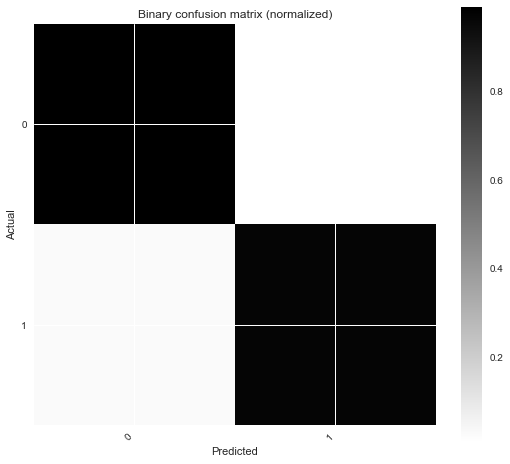

population: 199021
P: 99396
N: 99625
PositiveTest: 97304
NegativeTest: 101717
TP: 96455
TN: 98776
FP: 849
FN: 2941
TPR: 0.970411284156
TNR: 0.99147804266
PPV: 0.991274767738
NPV: 0.971086445727
FPR: 0.00852195734003
FDR: 0.00872523226178
FNR: 0.0295887158437
ACC: 0.980956783455
F1_score: 0.980732079309
MCC: 3.96381935164
informedness: 0.961889326816
markedness: 0.962361213465
prevalence: 0.499424683827
LRP: 113.87187772
LRN: 0.0298430369313
DOR: 3815.69335526
FOR: 0.0289135542731


c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:304: RuntimeWarning: overflow encountered in longlong_scalars
  (self.TN + self.FP) * (self.TN + self.FN)))


In [15]:
y_predicted1 = np.array(logistic.predict(X_test1))
y_right1 = np.array(y_test1)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()
confusion_matrix1.print_stats()

# Logistic Regression with balanced class weights

In [16]:
X2 = df.iloc[:,:-1]
y2 = df['Class']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2.as_matrix(), test_size=0.35, random_state=12)

In [17]:
logistic = linear_model.LogisticRegression(C=1e5, class_weight="balanced")
logistic.fit(X_train2, y_train2)
print("Score: ", logistic.score(X_test2, y_test2))

Score:  0.974037699507


Confusion matrix:
Predicted      0     1  __all__
Actual                         
0          96929  2572    99501
1             16   166      182
__all__    96945  2738    99683


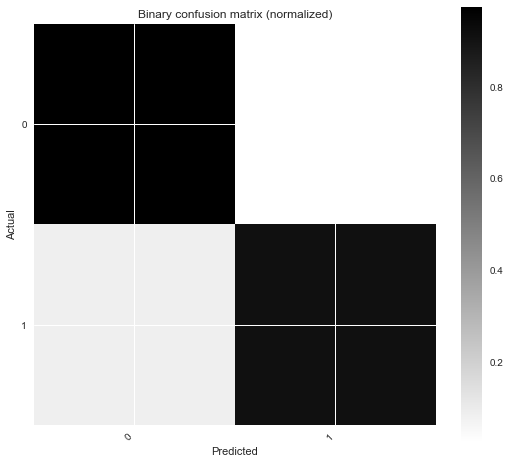

population: 99683
P: 182
N: 99501
PositiveTest: 2738
NegativeTest: 96945
TP: 166
TN: 96929
FP: 2572
FN: 16
TPR: 0.912087912088
TNR: 0.974151013558
PPV: 0.0606281957633
NPV: 0.999834957966
FPR: 0.0258489864423
FDR: 0.939371804237
FNR: 0.0879120879121
ACC: 0.974037699507
F1_score: 0.113698630137
MCC: 0.231483909597
informedness: 0.886238925646
markedness: 0.0604631537292
prevalence: 0.00182578774716
LRP: 35.2852485772
LRN: 0.0902448251745
DOR: 390.994702566
FOR: 0.000165042034143


In [18]:
y_predicted2 = np.array(logistic.predict(X_test2))
y_right2 = np.array(y_test2)
confusion_matrix2 = ConfusionMatrix(y_right2, y_predicted2)
print("Confusion matrix:\n%s" % confusion_matrix2)
confusion_matrix2.plot(normalized=True)
plt.show()
confusion_matrix2.print_stats()